<a href="https://colab.research.google.com/github/ethancma/the-random-walk/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration 2 - The Random Walk

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageDraw

In [3]:
steps = 1000

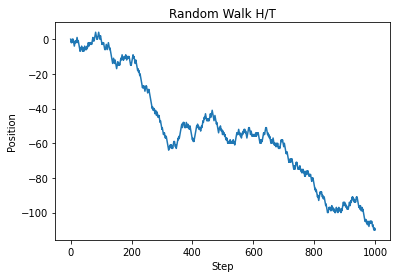

In [4]:
def basic_walk() -> list:
    """
    Generates simple random walk.
    :return positions:
    """
    positions = [0]
    for i in range(steps):
        rand = np.random.randint(0, 2)
        if rand:
            positions.append(positions[-1] + 1)
        if not rand:
            positions.append(positions[-1] - 1)
    return positions

positions = basic_walk()
plt.plot(positions)
plt.xlabel("Step")
plt.ylabel("Position")
plt.title("Random Walk H/T")
plt.show()

In [5]:
print(f"Starting position: 0")
print(f"Last Position (step {steps}): {positions[-1]}")
print(f"Square root of {steps} steps: {np.sqrt(steps)}")

Starting position: 0
Last Position (step 1000): -110
Square root of 1000 steps: 31.622776601683793


For this walk, we consider 3 static points representing the corners of a triangle, and a random starting point for the walk. Then we iterate the following procedure: We first roll a 3 sided dice to figure out which vertex the point walks towards, each step going halfway between its current position and the vertex's position.

In [6]:
def points_walk(iters) -> list:
    # Initializing the positions
    positions = np.zeros((iters, 2))
    positions[0, :] = np.random.uniform(-1,1, 2)

    # Arrange n static points evenly spaced around a unit circle
    statics = np.vstack((np.cos(np.linspace(0,2*np.pi, 4))[::-1], np.sin(np.linspace(0,2*np.pi,4))[::-1])).T
    for i in range(1, iters):
        vertex = np.random.randint(0,3)
        positions[i, :] = (positions[i-1]+statics[vertex])/2
    return positions.T

Text(0.5, 1.0, '3 points walk')

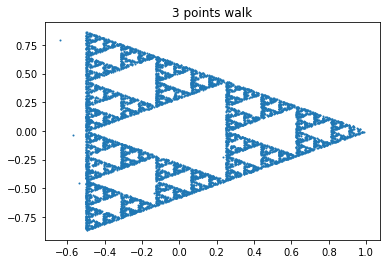

In [7]:
xvals, yvals = points_walk(iters=10000)
plt.scatter(xvals, yvals, s=1)
plt.title("3 points walk")

Planetary Walk

For this 2-dimensional walk, we will define a point to act as a planetary object that pulls our random walker towards it when it is far away, and pushes it away when it is too close. 

In [132]:
def distance(a,b):
    return np.sqrt((b[1] - a[1]) ** 2 + (b[0] - a[0]) ** 2)

def push_vector(a,b): # returns unit vector pointing from a to b
    return np.array( [b[0] - a[0],b[1] - a[1]],dtype = np.float64) / distance(a,b)
def planetary_walk(tractors, walkers,steps = 10000):
    positions = np.zeros(shape = (steps,len(walkers),2))
    positions[0] = walkers[:]
    for i in range(1,steps):
        for j in range(len(walkers)):
            step_vector =  np.array([0,0],dtype = np.float64)
            for k in range(len(tractors)):
                dist = distance(positions[i-1][j],tractors[k])
                push = push_vector(positions[i-1,j],tractors[k])
                if dist < 50:
                    step_vector -= 10. * push
                elif dist < 167:
                    step_vector += 6. * push
                else:
                    step_vector += 1. * push
            step_vector /= len(tractors)
            step_vector +=  np.array([12. * np.random.randint(2) - 6., 12. * np.random.randint(2) - 6.])
            positions[i][j] = positions[i-1][j] + step_vector
    return np.array(positions)
def draw_ellipse(draw,center,vertical_radius,horizontal_radius,fl,out,image_size):
    draw.ellipse((center[0] - vertical_radius,image_size[1] - center[1] - horizontal_radius,center[0] + vertical_radius,image_size[1] - center[1] + horizontal_radius),fill = fl, outline = out)

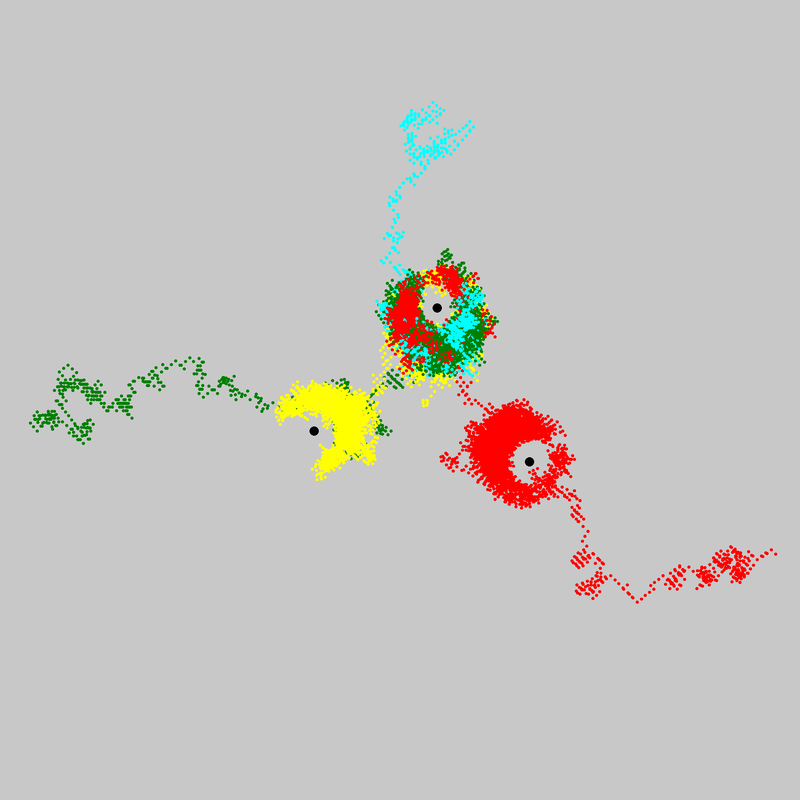

In [135]:
tractors = np.array([[400,250],[50,300],[250,500]])
average = .3333* (tractors[0] + tractors[1] + tractors[2])
walkers = np.array([[800,100],[-400,300],[250,800],average])
walk = planetary_walk(tractors,walkers)
image_size = (1300,1300,3)
image = Image.fromarray(200 + np.zeros(shape=image_size,dtype = np.uint8))
draw = ImageDraw.Draw(image)
offset = np.array([-460,-300])
colors = ['red','green','cyan','yellow']
for tractor in tractors:
    draw_ellipse(draw,-offset + tractor,7,7,'black','black',image_size)
for walkerlist in walk:
    for i in range(len(walkerlist)):
        walker = walkerlist[i]
        draw_ellipse(draw,-offset + walker,2,2,colors[i],colors[i],image_size)
display(image.resize((800,800),Image.ANTIALIAS))